In [2]:
# imports
import pandas as pd
import numpy as np
import torch

import clip
import open_clip

from PIL import Image
import os, csv, datetime

from sklearn.model_selection import train_test_split

In [27]:
# Load the features (X)
X = torch.load("CLIP_tensors.pt")

# Load the labels (y)
y = np.load("CLIP_style.npy", allow_pickle=True)

from sklearn.calibration import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [28]:
# Ensure X is a numpy array if it's not already
X = X.detach().numpy() if isinstance(X, torch.Tensor) else X

# Ensure y is a numpy array if it's not already
y = y.numpy() if isinstance(y, torch.Tensor) else y


In [29]:
X.shape, y.shape

((11687, 1536), (11687,))

In [30]:
# Split the data into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [32]:
# Random Forest
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

# Predictions
y_pred_RFC = RFC.predict(X_test)

# Accuracy
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
print(f"Accuracy: {accuracy_RFC * 100:.2f}%")

# Precision, Recall, and F1 Score
precision_RFC = precision_score(y_test, y_pred_RFC, average='weighted')
recall_RFC = recall_score(y_test, y_pred_RFC, average='weighted')
f1_RFC = f1_score(y_test, y_pred_RFC, average='weighted')

print(f"Precision: {precision_RFC:.2f}")
print(f"Recall: {recall_RFC:.2f}")
print(f"F1 Score: {f1_RFC:.2f}")

# Confusion Matrix
conf_matrix_RFC = confusion_matrix(y_test, y_pred_RFC)
print("Confusion Matrix:")
print(conf_matrix_RFC)


Accuracy: 87.85%
Precision: 0.89
Recall: 0.88
F1 Score: 0.87
Confusion Matrix:
[[ 78   1   1   0  48   0   0]
 [  0  44   1   0  42   0   0]
 [  1   1  54   0  17   0   0]
 [  0   0   0  13   3   0   0]
 [  1   2   1   1 807   0   1]
 [  0   0   0   0   2   5   0]
 [  0   0   0   0  19   0  26]]


In [33]:
# SVM Classifier
SVM = SVC()

# Random Forest
SVM = RandomForestClassifier()
SVM.fit(X_train, y_train)

# Predictions
y_pred_SVM = SVM.predict(X_test)

# Accuracy
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print(f"Accuracy: {accuracy_SVM * 100:.2f}%")

# Precision, Recall, and F1 Score
precision_SVM = precision_score(y_test, y_pred_SVM, average='weighted')
recall_SVM = recall_score(y_test, y_pred_SVM, average='weighted')
f1_SVM = f1_score(y_test, y_pred_SVM, average='weighted')

print(f"Precision: {precision_SVM:.2f}")
print(f"Recall: {recall_SVM:.2f}")
print(f"F1 Score: {f1_SVM:.2f}")

# Confusion Matrix
conf_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)
print("Confusion Matrix:")
print(conf_matrix_SVM)



Accuracy: 87.77%
Precision: 0.89
Recall: 0.88
F1 Score: 0.87
Confusion Matrix:
[[ 78   1   1   0  48   0   0]
 [  1  44   1   0  41   0   0]
 [  1   1  54   0  17   0   0]
 [  0   0   0  13   3   0   0]
 [  0   3   1   1 806   0   2]
 [  0   0   0   0   2   5   0]
 [  0   0   0   0  19   0  26]]


In [34]:
# XGBClassifier
XGB= xgb.XGBClassifier()

XGB.fit(X_train, y_train)

# Predictions
y_pred_XGB = XGB.predict(X_test)

# Accuracy
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
print(f"Accuracy: {accuracy_XGB * 100:.2f}%")

# Precision, Recall, and F1 Score
precision_XGB = precision_score(y_test, y_pred_XGB, average='weighted')
recall_XGB = recall_score(y_test, y_pred_XGB, average='weighted')
f1_XGB = f1_score(y_test, y_pred_XGB, average='weighted')

print(f"Precision: {precision_XGB:.2f}")
print(f"Recall: {recall_XGB:.2f}")
print(f"F1 Score: {f1_XGB:.2f}")

# Confusion Matrix
conf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)
print("Confusion Matrix:")
print(conf_matrix_XGB)



Accuracy: 88.79%
Precision: 0.89
Recall: 0.89
F1 Score: 0.88
Confusion Matrix:
[[ 90   1   3   0  33   0   1]
 [  0  47   1   0  39   0   0]
 [  1   0  54   0  17   0   1]
 [  0   0   0  13   3   0   0]
 [  1   5   2   1 802   0   2]
 [  0   0   0   0   2   5   0]
 [  1   0   0   0  17   0  27]]


In [39]:
# Naive Bayes
GNB= GaussianNB()

GNB.fit(X_train, y_train)

# Predictions
y_pred_GNB = GNB.predict(X_test)

# Accuracy
accuracy_GNB = accuracy_score(y_test, y_pred_GNB)
print(f"Accuracy: {accuracy_GNB * 100:.2f}%")

# Precision, Recall, and F1 Score
precision_GNB = precision_score(y_test, y_pred_GNB, average='weighted')
recall_GNB = recall_score(y_test, y_pred_GNB, average='weighted')
f1_GNB = f1_score(y_test, y_pred_GNB, average='weighted')

print(f"Precision: {precision_GNB:.2f}")
print(f"Recall: {recall_GNB:.2f}")
print(f"F1 Score: {f1_GNB:.2f}")

# Confusion Matrix
conf_matrix_GNB = confusion_matrix(y_test, y_pred_GNB)
print("Confusion Matrix:")
print(conf_matrix_GNB)



Accuracy: 38.49%
Precision: 0.67
Recall: 0.38
F1 Score: 0.43
Confusion Matrix:
[[ 63  13  15   4  16   1  16]
 [  9  35  12   3  18   0  10]
 [ 15   1  30   0   1   0  26]
 [  2   0   0   9   3   0   2]
 [129 146  72  19 275  13 159]
 [  1   0   0   0   0   4   2]
 [  5   0   3   0   3   0  34]]


In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [74]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(1536, 768)  # Input layer to first hidden layer
        self.bn1 = nn.BatchNorm1d(768)  # Batch normalization layer
        self.fc2 = nn.Linear(768, 256)   # Second hidden layer
        self.bn2 = nn.BatchNorm1d(256)  # Batch normalization layer
        self.dropout = nn.Dropout(0.2)
        self.fc3 = nn.Linear(256, 64)    # Third hidden layer
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 16)     # Fourth hidden layer
        self.bn4 = nn.BatchNorm1d(16)
        self.fc5 = nn.Linear(16, 7)      # Output layer
        self.dropout = nn.Dropout(0.2)   # Dropout layer

    def forward(self, x):
        # Forward pass through the network
        x = F.relu(self.bn1(self.fc1(x)))  # Activation function for hidden layer
        x = self.dropout(x)      # Apply dropout
        x = F.relu(self.bn2(self.fc2(x)))  # Activation function for hidden layer
        x = F.relu(self.bn3(self.fc3(x)))  # Activation function for hidden layer
        x = F.relu(self.bn4(self.fc4(x)))  # Activation function for hidden layer
        x = self.fc5(x)  # Output layer (raw logits, not softmax)
        return x


In [75]:
# Initialize the model
model = SimpleNN()

# Define the loss function
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification

# Define an optimizer, e.g., Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [82]:
from torch.utils.data import DataLoader, TensorDataset

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Create DataLoader for both training and validation sets
train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 16

train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=batch_size, shuffle=False)


# Function to calculate accuracy
def accuracy(y_pred, y_true):
    # Get the predicted class from the maximum value in the prediction tensor
    _, predicted = torch.max(y_pred.data, 1)
    total = y_true.size(0)  # Total number of labels
    correct = (predicted == y_true).sum().item()  # Count how many predictions match the true labels
    return correct / total



# Early Stopping Criteria
patience = 10
best_val_loss = float("inf")
counter = 0

num_epochs = 10000 

# Initialize lists to store per-epoch loss and accuracy
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

# Training Loop with Validation
for epoch in range(num_epochs):
    # Training Phase
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        accuracy_train = accuracy(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    # Validation Phase
    model.eval()
    with torch.no_grad():
        val_loss = 0
        for X_val_batch, y_val_batch in val_loader:
            y_val_pred = model(X_val_batch)
            val_loss += criterion(y_val_pred, y_val_batch).item()
            accuracy_val = accuracy(y_val_pred, y_val_batch)
        val_loss /= len(val_loader)

        # Early Stopping Check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0  # reset the counter if performance improved
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping triggered")
                break
            
    # Inside your training loop
    train_losses.append(loss.item())
    val_losses.append(val_loss)
    train_accuracies.append(accuracy_train)
    val_accuracies.append(accuracy_val)
            
    print(f'Epoch [{epoch+1}/{num_epochs}], \n\
        Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}\n\
        Accuracy: {accuracy_train:.4f}, Val Accuracy: {accuracy_val:.4f}')


Epoch [1/10000], 
        Loss: 1.2743, Val Loss: 0.5892
        Accuracy: 0.6000, Val Accuracy: 0.0000
Epoch [2/10000], 
        Loss: 0.0168, Val Loss: 0.5728
        Accuracy: 1.0000, Val Accuracy: 0.0000
Epoch [3/10000], 
        Loss: 0.1565, Val Loss: 0.6127
        Accuracy: 0.8000, Val Accuracy: 0.0000
Epoch [4/10000], 
        Loss: 0.1840, Val Loss: 0.6039
        Accuracy: 0.8000, Val Accuracy: 0.0000
Epoch [5/10000], 
        Loss: 0.1243, Val Loss: 0.5806
        Accuracy: 1.0000, Val Accuracy: 0.0000
Epoch [6/10000], 
        Loss: 0.0111, Val Loss: 0.6240
        Accuracy: 1.0000, Val Accuracy: 0.0000
Epoch [7/10000], 
        Loss: 0.0023, Val Loss: 0.6531
        Accuracy: 1.0000, Val Accuracy: 0.0000
Epoch [8/10000], 
        Loss: 0.0923, Val Loss: 0.6604
        Accuracy: 1.0000, Val Accuracy: 0.0000
Epoch [9/10000], 
        Loss: 0.0901, Val Loss: 0.6372
        Accuracy: 1.0000, Val Accuracy: 0.0000
Epoch [10/10000], 
        Loss: 0.0091, Val Loss: 0.6458
      

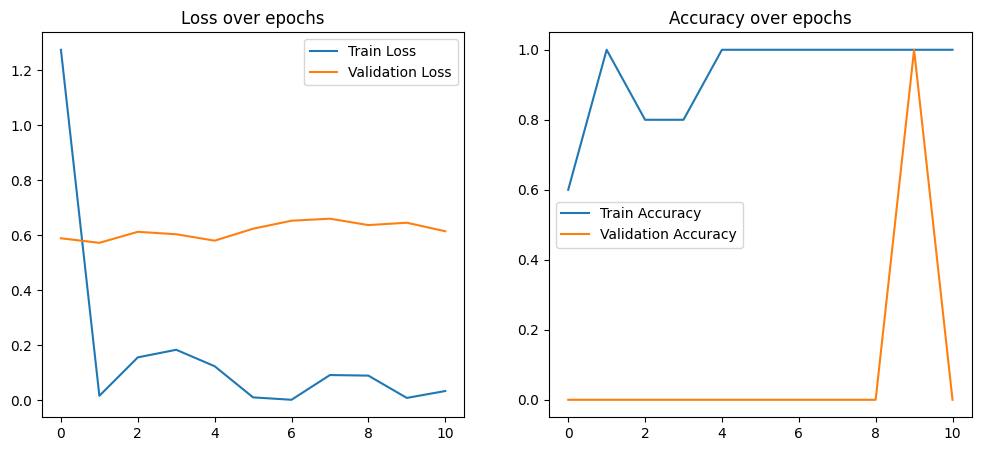

In [83]:
import matplotlib.pyplot as plt

# After the training loop, plot the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()


In [84]:
# After training, you might want to see predictions on test data
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()  # or another appropriate conversion


In [85]:
# Ensure y_pred is a tensor
y_pred_tensor = torch.tensor(y_pred) if not isinstance(y_pred, torch.Tensor) else y_pred

# Get the predicted class labels
_, y_pred_labels = torch.max(y_pred_tensor, 1)
y_pred_labels = y_pred_labels.numpy()  # Convert tensor to numpy array if needed

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Convert y_test to numpy if it's a tensor
y_test_np = y_test.numpy() if isinstance(y_test, torch.Tensor) else y_test

# Calculate Accuracy
accuracy = accuracy_score(y_test_np, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Calculate F1 Score
f1 = f1_score(y_test_np, y_pred_labels, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Calculate and Print Confusion Matrix
conf_matrix = confusion_matrix(y_test_np, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8734
F1 Score: 0.8703
Confusion Matrix:
[[ 97   1   4   0  26   0   0]
 [  3  54   3   0  27   0   0]
 [  2   2  58   0  11   0   0]
 [  0   0   0  14   2   0   0]
 [ 13  19   8   1 766   1   5]
 [  0   0   0   0   1   6   0]
 [  3   0   3   1  12   0  26]]


# Save the entire model
torch.save(model, 'model.pth')
